3. Multivariate Analysis (15 poin)

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

C:\Users\FARADI~1\AppData\Local\Temp/ipykernel_19928/2696046862.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot = True, fmt = '.2f')


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


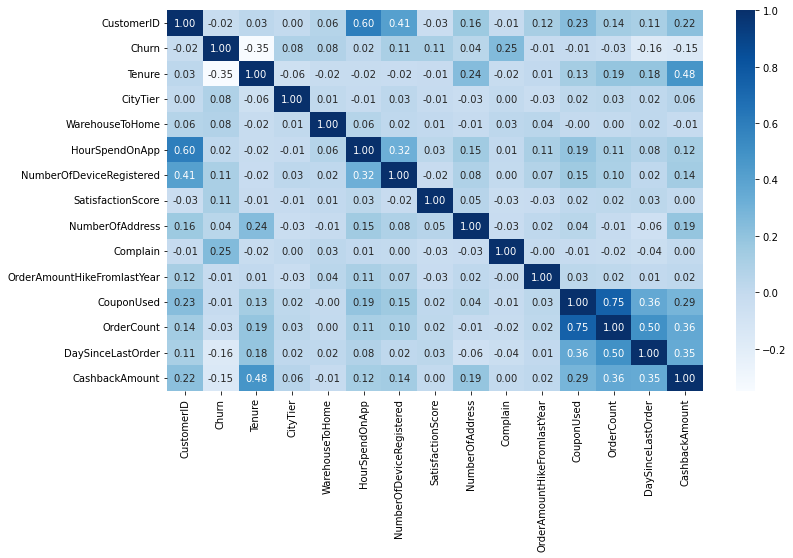

In [10]:
df = pd.read_excel('E_Commerce_Dataset.xlsx')
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), cmap='Blues', annot = True, fmt = '.2f')
df.head()

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

Dari heatmap tersebut dapat dilihat bahwa kolom yang memiliki korelasi linear terbesar yaitu antara 'CouponUsed' dan 'OrderCount' mencapai 0.75. Fokus project kali ini yaitu Churn pelanggan sehingga apabila dilihat dari 'Churn', fitur yang memiliki korelasi terbesar yaitu 'Complain' bernilai 0.25. Oleh karena itu, dilakukan perincian lebih lanjut untuk fitur tersebut pada barplot di bawah:

<AxesSubplot:xlabel='Churn', ylabel='Complain'>

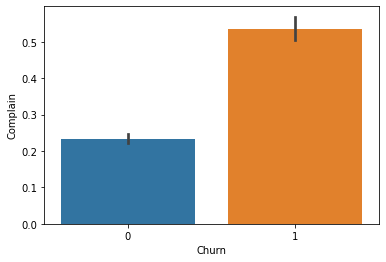

In [11]:
sns.barplot(data = df, x = 'Churn', y = 'Complain')

Dari data tersebut dapat terlihat bahwa rata-rata Complain pelanggan meningkat dari pelanggan yang tidak churn dan churn secara linear dengan korelasi 0.25.

Sementara itu, beberapa fitur bersifat kategorikal yang tidak terbaca di heatmap. Sehingga dilakukan korelasi linear pearson menggunakan one-hot encoding terhadap fitur 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus' seperti berikut:

In [12]:
X = df[['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']]
X = pd.get_dummies(data=X, drop_first=True)
Y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
predictions = model.predict(X_test)
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

C:\Users\Faradilla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Faradilla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     22.06
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           7.37e-62
Time:                        14:21:41   Log-Likelihood:                -1309.3
No. Observations:                3378   AIC:                             2653.
Df Residuals:                    3361   BIC:                             2757.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

C:\Users\Faradilla\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\Faradilla\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Dari regresi tersebut, dapat disimpulkan bahwa fitur-fitur kategorikal tersebut memiliki korelasi yang sangat rendah terhadap Churn pada Multivariate Regression.

<Figure size 1440x1440 with 0 Axes>

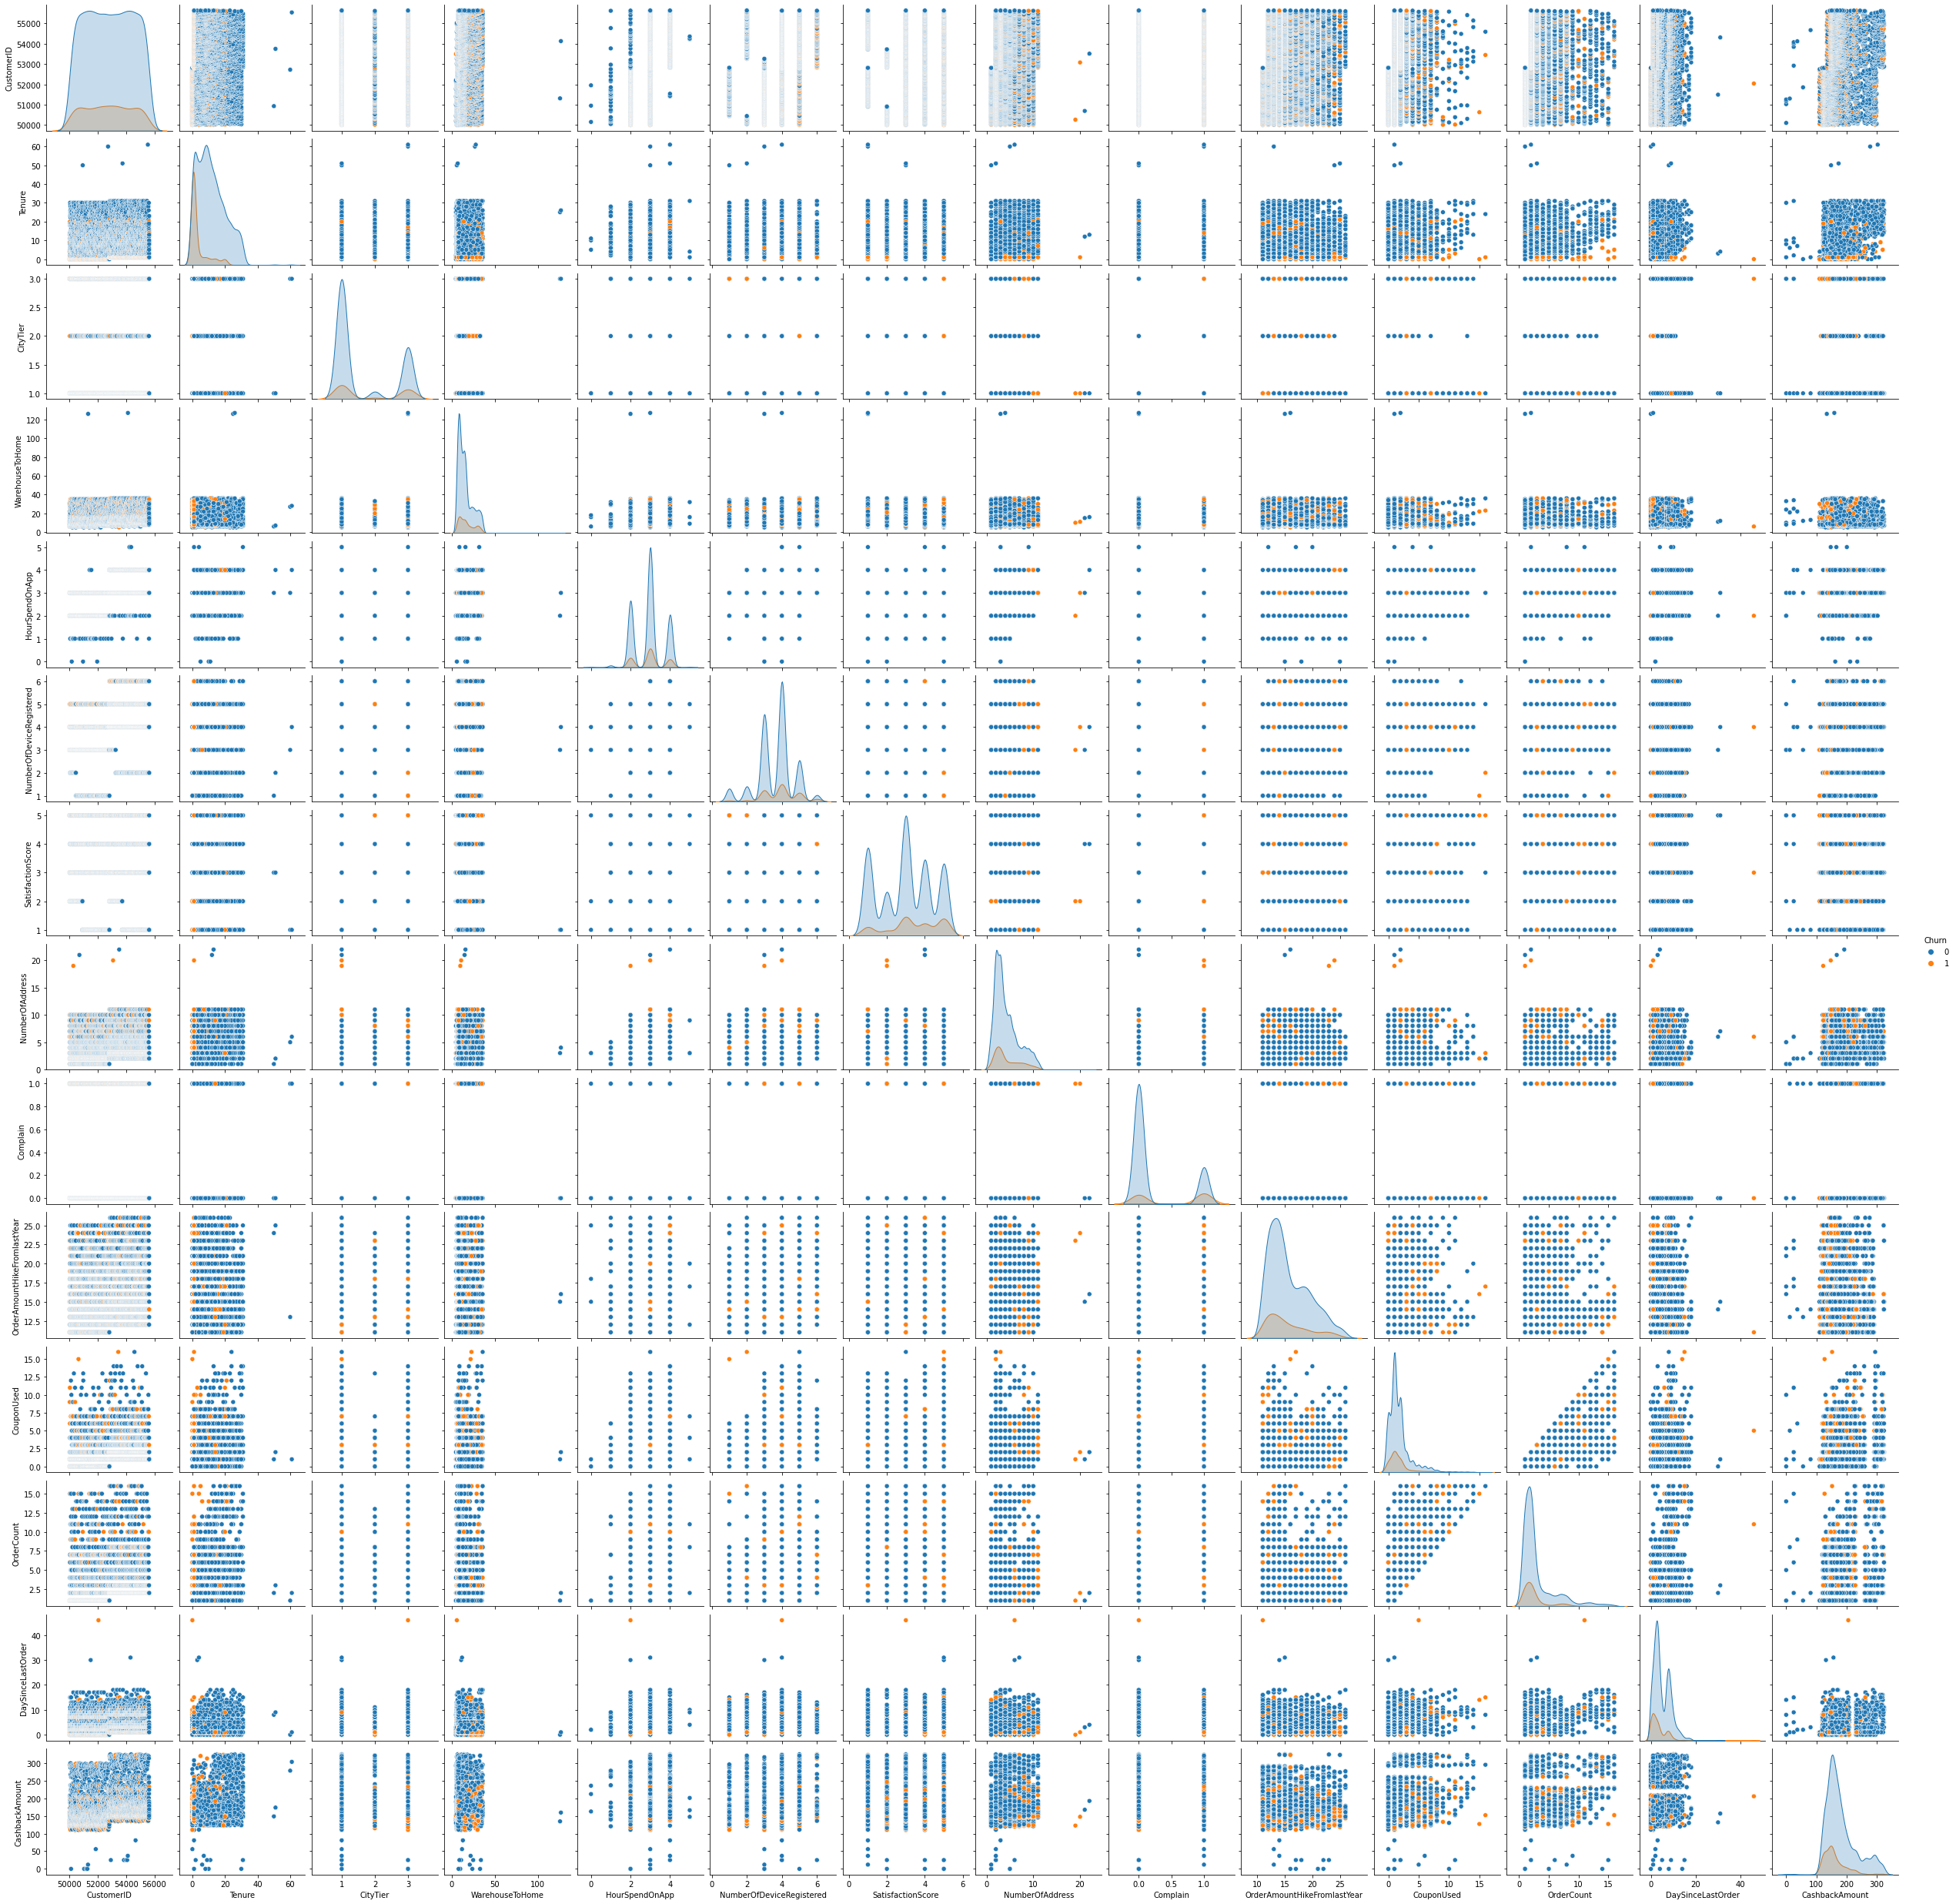

In [17]:
plt.figure(figsize=(20, 20))
sns.pairplot(df, diag_kind='kde', hue='Churn')

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu 
dilakukan terhadap feature itu?

- Jika dilihat dari angka kolerasi di heatmap dan pola pada pairpolot, dapat diambil kesimpulan bahwa CouponUsed memiliki kolerasi yang sangat kuat (dengan kolerasi positif )dengan orderCount yakni > 0,7
- Oleh karena itu kita harus mengambil tindakan dengan cara: menghilangkan salah satu feature tersebut agar tidak terjadi redudan. 
- Untuk pemilihan feature yang akan dihilangkan diantar 2 feature tersebut, kita memilih menghilangkan feature CouponUsed.
- Hal itu dilakukan karena dilihat dari nilai kolerasi OrderCount-Churn > kolerasi CouponUsed-Churn, yakni 0.03 > 0.01. Sehingga feature OrderCount masih memiliki kolerasi yang lebih kuat terhadap target/Churn.